<a href="https://colab.research.google.com/github/saadkarim754/Fake_News_classification/blob/main/fake_news_detection_using_gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import chardet

In [33]:
with open("True.csv", 'rb') as rawdata:
       result = chardet.detect(rawdata.read(100000)) # Read a large portion of the file for better detection

print(result['encoding']) # Print the detected encoding

MacRoman


In [34]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv", encoding ='MacRoman')

In [35]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [32]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


by this stage we have loaded the data

by now our datasets have , 5 coloumns , we add a new column the label i.e 0 or 1.

In [36]:
data_fake["class"]=0
data_true["class"]=1

In [37]:
data_fake.shape,data_true.shape

((23481, 5), (21432, 5))

first number is the rows and second is the column\
now we will remove , the last entries of both csv files for later testing

In [38]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,21000,-1):
    data_fake.drop([i],axis=0,inplace=True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416,21000,-1):
    data_true.drop([i],axis=0,inplace=True)

In [39]:
data_fake.shape,data_true.shape

((21001, 5), (21016, 5))

as u can see 10 rows have been deducted from both csvs.

In [40]:
data_fake_manual_testing["class"]=0
data_true_manual_testing["class"]=1

<ipython-input-40-b0056e2a4ec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"]=0
<ipython-input-40-b0056e2a4ec9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"]=1


In [41]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [42]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21422,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,22-Aug-17,1
21423,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21424,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21425,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,22-Aug-17,1
21426,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,21-Aug-17,1
21427,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,1
21428,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,1
21429,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,1
21430,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,1
21431,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22-Aug-17,1


so at this point we have seperated two mini datasets for later **testing**\
now we will create a new dataset , that will have both the true and the fake data sets

In [43]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [44]:
data_merge.tail(10)

,title,text,subject,date,class
21422,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,22-Aug-17,1
21423,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21424,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21425,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,22-Aug-17,1
21426,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,21-Aug-17,1
21427,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,1
21428,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,1
21429,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,1
21430,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,1
21431,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22-Aug-17,1


now in the next step we remove the columns that are not required

In [45]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [46]:
data = data_merge.drop(['title','subject','date'],axis=1)

In [47]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


as u can see we only have the text and class columns

In [48]:
data.isnull().sum()

,0
text,0
class,0


now we have to randomly shuffle our data

In [49]:
data = data.sample(frac = 1)

In [50]:
data.head(10)

,text,class
17183,LONDON (Reuters) - The chances of Northern Ire...,1
9116,The NFL announced Tuesday that the final Sund...,0
1353,Trump is not the only U.S. leader in Europe ri...,0
5704,WASHINGTON (Reuters) - U.S. President Donald T...,1
5098,WASHINGTON (Reuters) - Conservative Republican...,1
6497,WASHINGTON (Reuters) - The U.S. Congress on Fr...,1
9422,(Reuters) - U.S. Democratic presidential candi...,1
14209,Riiiight just choose from what works,0
3057,WASHINGTON (Reuters) - In a highly unusual int...,1
7371,"NEW YORK (Reuters) - Move over, Janet Yellen. ...",1


as u can see the indexing is not right now we have to fix that


In [51]:
data.reset_index(inplace=True)

In [52]:
data.head(10)

,index,text,class
0,17183,LONDON (Reuters) - The chances of Northern Ire...,1
1,9116,The NFL announced Tuesday that the final Sund...,0
2,1353,Trump is not the only U.S. leader in Europe ri...,0
3,5704,WASHINGTON (Reuters) - U.S. President Donald T...,1
4,5098,WASHINGTON (Reuters) - Conservative Republican...,1
5,6497,WASHINGTON (Reuters) - The U.S. Congress on Fr...,1
6,9422,(Reuters) - U.S. Democratic presidential candi...,1
7,14209,Riiiight just choose from what works,0
8,3057,WASHINGTON (Reuters) - In a highly unusual int...,1
9,7371,"NEW YORK (Reuters) - Move over, Janet Yellen. ...",1


now as u can see we , have reset the index but the previous index
still stays , so now we have to remove that

In [53]:
data.drop(["index"],axis=1,inplace=True)

In [54]:
data.head(10)

,text,class
0,LONDON (Reuters) - The chances of Northern Ire...,1
1,The NFL announced Tuesday that the final Sund...,0
2,Trump is not the only U.S. leader in Europe ri...,0
3,WASHINGTON (Reuters) - U.S. President Donald T...,1
4,WASHINGTON (Reuters) - Conservative Republican...,1
5,WASHINGTON (Reuters) - The U.S. Congress on Fr...,1
6,(Reuters) - U.S. Democratic presidential candi...,1
7,Riiiight just choose from what works,0
8,WASHINGTON (Reuters) - In a highly unusual int...,1
9,"NEW YORK (Reuters) - Move over, Janet Yellen. ...",1


now weve got a properly formated dataset\
now , , we will pre-process the data set with a function

In [55]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

so we now apply this function on our data variable , on its text column

In [56]:
data['text']=data['text'].apply(wordopt)

In [57]:
data.head(10)

,text,class
0,london reuters the chances of northern ire...,1
1,the nfl announced tuesday that the final sund...,0
2,trump is not the only u s leader in europe ri...,0
3,washington reuters u s president donald t...,1
4,washington reuters conservative republican...,1
5,washington reuters the u s congress on fr...,1
6,reuters u s democratic presidential candi...,1
7,riiiight just choose from what works,0
8,washington reuters in a highly unusual int...,1
9,new york reuters move over janet yellen ...,1


as u can see the data is pre-processed now \
now we create the x and y variables

In [58]:
x = data['text']
y = data['class']

now we separate our data for training and testing

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

by now we have a fitted model

In [64]:
predict_gb = GB.predict(xv_test)

In [65]:
GB.score(xv_test, y_test)

0.9968586387434555

In [66]:
print(classification_report(y_test, predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5246
           1       0.99      1.00      1.00      5259

    accuracy                           1.00     10505
   macro avg       1.00      1.00      1.00     10505
weighted avg       1.00      1.00      1.00     10505



now we will manual testing of our model

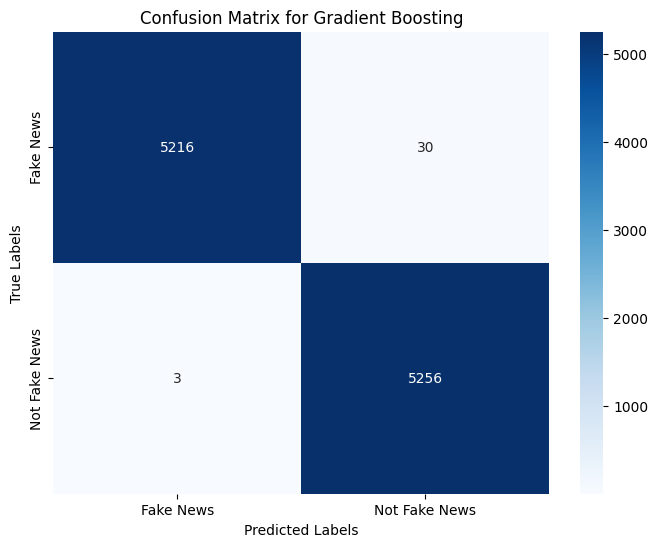

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, predict_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake News", "Not Fake News"], yticklabels=["Fake News", "Not Fake News"])
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_GB = GB.predict(new_xv_test)
    return print("\n\nGB Prediction: {} ".format(output_lable(pred_GB[0])))

now the above function will take some news from us, pre-process it and give it to GB.predict function

In [ ]:
news = str(input())
manual_testing(news)

A secret government report has revealed that the moon landing in 1969 was staged in a Hollywood studio. The report, leaked by an anonymous whistleblower, claims that all moon landing footage was filmed on Earth and that astronauts never left the planet. Officials have denied the claims, stating they are part of a conspiracy theory with no factual basis.


GB Prediction: Fake News 


In [ ]:
news = str(input())
manual_testing(news)


BEIRUT (Reuters) - Lebanon s interior minister said on Thursday that Uber driver suspected of murdering a British embassy worker last week had served time in prison, and he accused the company of not checking criminal records of its drivers. The body of Rebecca Dykes was found strangled on Saturday next to a highway outside Beirut. Police detained a suspect on Monday and said the crime was not politically motivated. Minister Nohad Machnouk said the driver had three priors on his judicial record involving drugs and had been imprisoned on that basis. This company, when it hires drivers, and lets them work within its organisation, does not check their priors , he said at a news conference. An Uber spokesperson said all drivers the company uses in Lebanon are fully licensed by the government and must have a clear judicial record. The spokesperson said a copy of the driver s judicial record published by local media, showing no judgments against the driver, was accurate. Uber confirmed in an

In [ ]:
news = str(input())
manual_testing(news)

GENEVA (Reuters) - North Korea and the United States clashed at a U.N. forum on Tuesday over their military intentions towards one another, with Pyongyang s envoy declaring it would never put its nuclear deterrent on the negotiating table. Japan, well within reach of North Korea s missiles, said the world must maintain pressure on the reclusive country to rein in its nuclear and missile programs and now was not the time for a resumption of multi-party talks. North Korea has pursued its weapons programs in defiance of U.N. Security Council sanctions and ignored all calls, including from major ally China, to stop, prompting a bellicose exchange of rhetoric between the North and the United States. North Korea justifies its weapons programs, including its recent threat to fire missiles towards the U.S. Pacific territory of Guam, by pointing to perceived U.S. hostility, such as military exercises with South Korea this week. U.S. disarmament ambassador Robert Wood told a U.N.-sponsored Confe